<a href="https://colab.research.google.com/github/RodrigoLima82/bootcamp_igti_machine_learning/blob/master/aula_1_FAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Este programa é utilizado para o desenvolvimento do trabalho prático da disciplina FAM do bootcamp de MLE

In [0]:
#importando as bibliotecas
import pandas as pd #biblioteca utilizada para o tratamento de dados via dataframes 
import numpy as np #biblioteca utilizada para o tratamento de valores numéricos (vetores e matrizes)
import matplotlib.pyplot as plt #biblioteca utilizada para construir os gráficos
import seaborn as sn #biblioteca utilizada para os plots mais bonitos
from sklearn.model_selection import train_test_split #biblioteca para a divisão do dataset entre treinamento e teste

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import files  #biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

Saving data.csv to data.csv


In [0]:
#realizando a leitura do arquivo (dataset)
nome_do_arquivo="data.csv"
dataframe_envio_portos= pd.read_csv(nome_do_arquivo)

In [0]:
#apresentando as 5 primeiras linhas do dataset
dataframe_envio_portos.head()

,valid_import,item,importer_id,exporter_id,country_of_origin,declared_quantity,declared_cost,mode_of_transport,route,date_of_departure,date_of_arrival,declared_weight,actual_weight,days_in_transit
0,True,cigar,111,222,India,129,3784.402551,sea,asia,04/25/2019,05/13/2019,1608.605135,1637.661221,18.232857
1,True,cigar,111,222,India,104,3081.350806,sea,america,04/22/2019,05/24/2019,831.719301,848.273419,32.436029
2,True,cigar,111,222,India,130,4414.125741,sea,europe,04/29/2019,05/16/2019,1527.704165,1582.063911,16.996206
3,True,cigar,111,222,India,143,2533.535991,sea,panama,05/05/2019,05/25/2019,1138.680563,1179.993817,19.965886
4,True,cigar,111,222,China,141,4396.397887,sea,asia,05/14/2019,06/05/2019,761.744581,781.735080,22.160034


In [0]:
dataframe_envio_portos.info() #verificando os tipos de variáveis e se existem ou não valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   valid_import       120 non-null    bool   
 1   item               120 non-null    object 
 2   importer_id        120 non-null    int64  
 3   exporter_id        120 non-null    int64  
 4   country_of_origin  120 non-null    object 
 5   declared_quantity  120 non-null    int64  
 6   declared_cost      120 non-null    float64
 7   mode_of_transport  120 non-null    object 
 8   route              120 non-null    object 
 9   date_of_departure  120 non-null    object 
 10  date_of_arrival    120 non-null    object 
 11  declared_weight    120 non-null    float64
 12  actual_weight      120 non-null    float64
 13  days_in_transit    120 non-null    float64
dtypes: bool(1), float64(4), int64(3), object(6)
memory usage: 12.4+ KB


In [0]:
dataframe_envio_portos.isnull().sum()

valid_import         0
item                 0
importer_id          0
exporter_id          0
country_of_origin    0
declared_quantity    0
declared_cost        0
mode_of_transport    0
route                0
date_of_departure    0
date_of_arrival      0
declared_weight      0
actual_weight        0
days_in_transit      0
dtype: int64

**Existem Colunas Com Valores Nulos?**

In [0]:
dataframe_envio_portos.shape

(120, 14)

**Quantas Instâncias e Características Existem no Dataset?**



In [0]:
#analisando a "estatística" do dataset
dataframe_envio_portos.describe()

,importer_id,exporter_id,declared_quantity,declared_cost,declared_weight,actual_weight,days_in_transit
count,120.0,120.0,120.000000,120.000000,120.000000,120.000000,120.000000
mean,111.0,222.0,127.458333,6743.649881,1264.702934,1306.429806,35.424705
std,0.0,0.0,14.641311,2991.797050,633.149971,656.911704,26.571591
min,111.0,222.0,100.000000,1441.012419,18.459509,19.275241,12.410325
25%,111.0,222.0,115.750000,4442.903914,820.314400,841.763738,18.225625
50%,111.0,222.0,131.500000,6010.218745,1255.597743,1305.716419,27.044293
75%,111.0,222.0,139.000000,8887.095370,1711.314045,1763.681083,44.356374
max,111.0,222.0,149.000000,14281.325362,2806.338955,2918.681683,147.787560


**Qual é o Valor Médio Para os Pesos Declarados?**

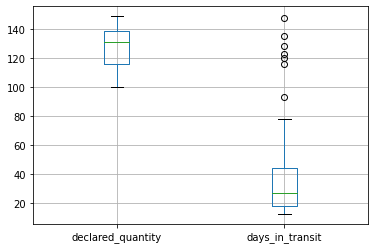

In [0]:
#identificando possíveis outliers
dataframe_envio_portos[['declared_quantity','days_in_transit']].boxplot()

In [0]:
#Z-score
from scipy import stats
z = np.abs(stats.zscore(dataframe_envio_portos['days_in_transit'].values))
threshold = 3
result=np.where(z > threshold)

df_tempo_viagem_outlier=dataframe_envio_portos.iloc[result[0]]
df_tempo_viagem_outlier

,valid_import,item,importer_id,exporter_id,country_of_origin,declared_quantity,declared_cost,mode_of_transport,route,date_of_departure,date_of_arrival,declared_weight,actual_weight,days_in_transit
61,False,cigar,111,222,India,131,1594.074225,sea,america,05/08/2019,09/01/2019,1489.554025,1551.161701,116.140911
73,False,cigar,111,222,France,110,8953.524711,sea,america,05/16/2019,09/13/2019,193.130429,200.966710,120.406246
81,False,cigar,111,222,India,134,3326.973672,sea,america,05/12/2019,10/07/2019,280.984620,289.694339,147.787560
85,False,cigar,111,222,China,113,5745.640896,sea,america,04/22/2019,08/28/2019,627.941986,655.845304,128.416712
97,False,cigar,111,222,Italy,144,10849.145863,sea,america,05/09/2019,09/09/2019,291.849891,303.328673,123.277846
105,False,cigar,111,222,China,139,4174.018265,sea,america,05/12/2019,09/25/2019,231.583758,243.047276,135.627561


**Existem Possíveis Outliers?**

In [0]:
#realizando a análise de regressão
x=dataframe_envio_portos['declared_weight'].values  #variável independente 
Y=dataframe_envio_portos['actual_weight'].values #variável dependente 

In [0]:
type(x)

numpy.ndarray

In [0]:
type(dataframe_envio_portos['declared_weight'])

pandas.core.series.Series

In [0]:
#importa o modelo de regressão linear univariada
from sklearn.linear_model import LinearRegression

In [0]:
#Realiza a construção do modelo de regressão
reg= LinearRegression()
x_Reshaped=x.reshape(-1, 1) #coloca os dados no formato 2D
regressao= reg.fit (x_Reshaped,Y) # encontra os coeficientes (realiza a regressão)

In [0]:
#realiza a previsão
previsao=reg.predict(x_Reshaped)

In [0]:
#análise do modelo
from sklearn.metrics import r2_score #método para o cálculo do R2 (coeficiente de determinação)

In [0]:
#parâmetros encontrados
print('Y = {}X {}'.format(reg.coef_,reg.intercept_))

R_2 = r2_score(Y, previsao)  #realiza o cálculo do R2

print("Coeficiente de Determinação (R2):", R_2)


Y = [1.03718115]X -5.296233030439225
Coeficiente de Determinação (R2): 0.9993288165644932


**Pelo Coefiente de Determinação, o Que É Possível Afirmar Sobre a Relação Entre as Variáveis Peso Real x Peso Declarado?**

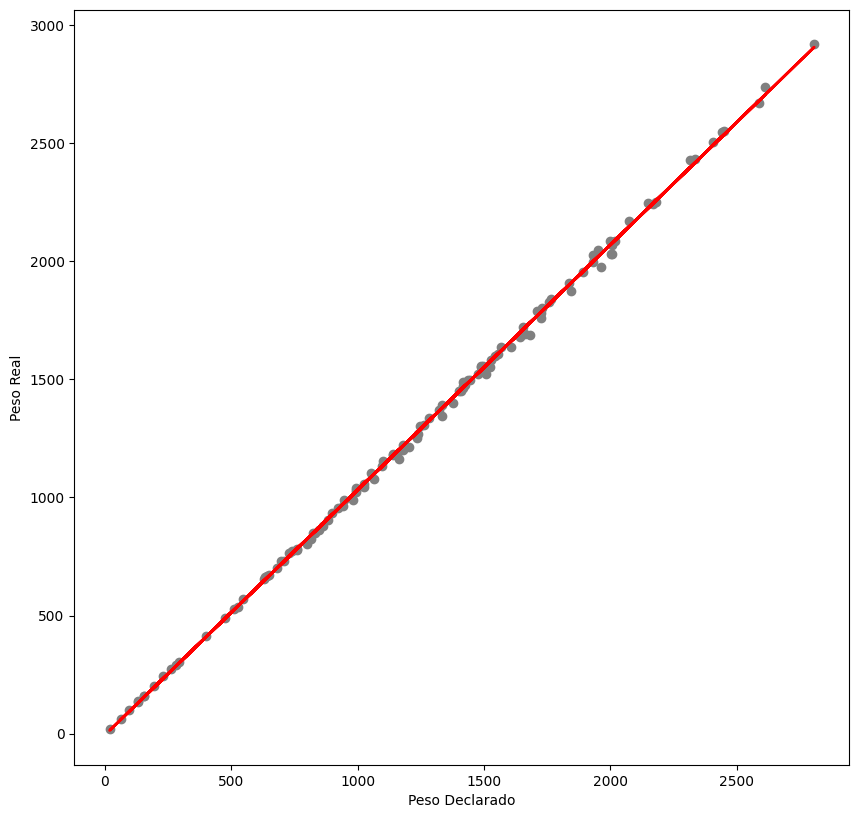

In [0]:
#realiza o plot dos dados
plt.figure(figsize=(10, 10), dpi=100)
plt.scatter(x, Y,  color='gray') #realiza o plot do gráfico de dispersão
plt.plot(x, previsao, color='red', linewidth=2) # realiza o plto da "linha"
plt.xlabel("Peso Declarado")
plt.ylabel("Peso Real")
plt.show()

**Realizando uma análise sobre o produto de origem Chinesa**

In [0]:
dataframe_envio_portos['item'].nunique()  #conta a quantidade de valores em cada série

1

In [0]:
dataframe_envio_portos['country_of_origin'].unique() #mostra os valores diferentes existentes

array(['India', 'China', 'USA', 'France', 'Italy'], dtype=object)

In [0]:
new_df=dataframe_envio_portos[dataframe_envio_portos['country_of_origin']=='China']
new_df=new_df[['declared_quantity','declared_cost','declared_weight','actual_weight']]
new_df.head()

,declared_quantity,declared_cost,declared_weight,actual_weight
4,141,4396.397887,761.744581,781.735080
5,122,6092.118365,1332.198492,1345.364184
6,136,5199.846978,1763.483791,1840.537634
7,141,6680.072683,1320.163263,1370.156345
24,140,6670.143239,1408.681150,1449.195819


In [0]:
#aplicando a regressão linear paara as variáveis 
x2=new_df['declared_weight'].values  #variável independente 
Y2=new_df['actual_weight'].values #variável dependente 

In [0]:
#Realiza a construção do modelo de regressão
reg2= LinearRegression()
x_Reshaped2=x2.reshape(-1, 1) #coloca os dados no formato 2D
regressao2= reg2.fit (x_Reshaped2,Y2) # encontra os coeficientes (realiza a regressão)

In [0]:
#realiza a previsão
previsao2=reg2.predict(x_Reshaped2)

In [0]:
R_2 = r2_score(Y2, previsao2)  #realiza o cálculo do R2
print(R_2)

0.9991166595706871


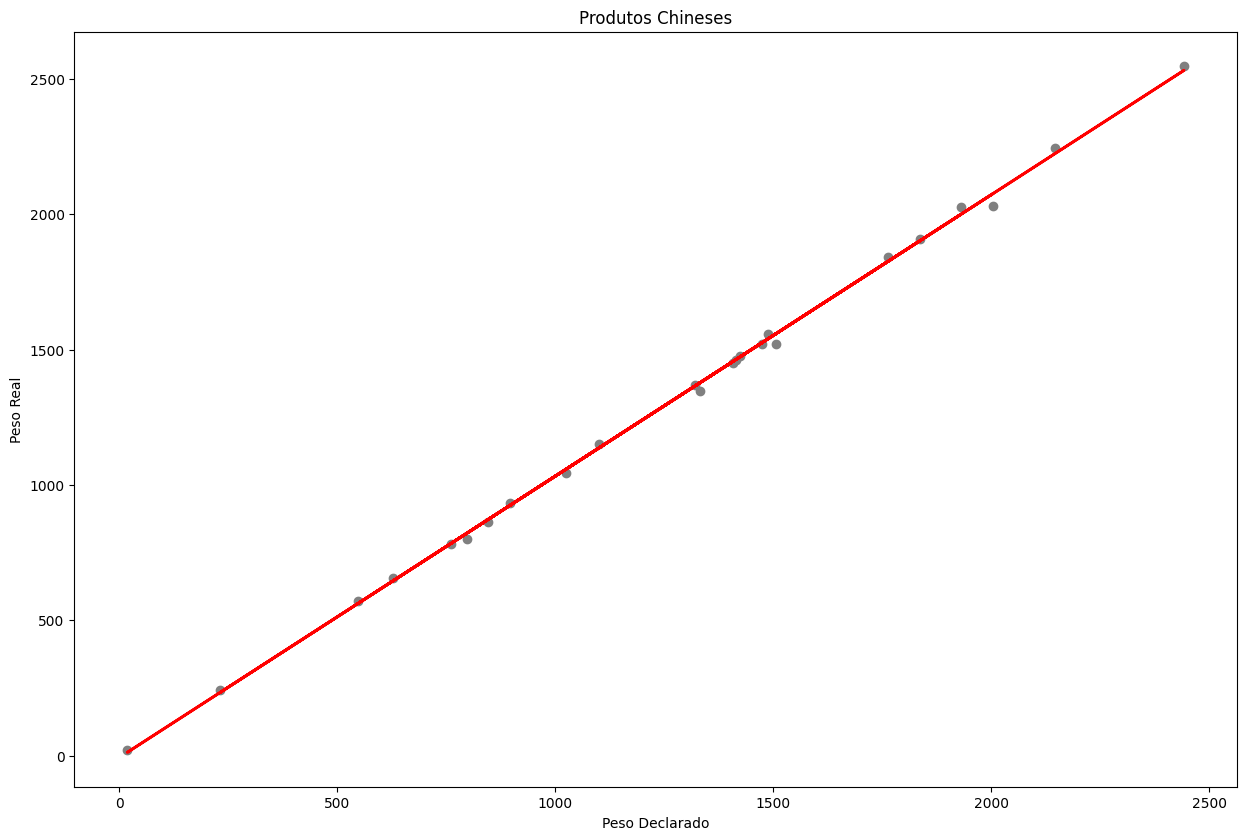

In [0]:
#realiza o plot dos dados
plt.figure(figsize=(15, 10), dpi=100)
plt.scatter(x2, Y2,  color='gray') #realiza o plot do gráfico de dispersão
plt.plot(x2, previsao2, color='red', linewidth=2) # realiza o plto da "linha"
plt.xlabel("Peso Declarado")
plt.ylabel("Peso Real")
plt.title("Produtos Chineses")
plt.show()

In [0]:
#analisando a correlação entre os dados

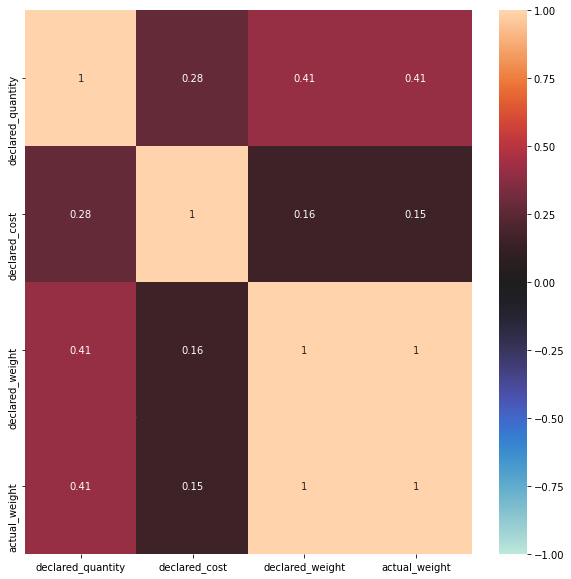

In [0]:
#realizando o plot da matriz de correlação
plt.figure(figsize=(10, 10))
matriz_de_correlação = new_df.corr()  #construindo a matriz de correlação
sn.heatmap(matriz_de_correlação, annot=True,vmin=-1, vmax=1,center= 0)  #plotando a matriz de correlação com o seaborn
plt.show()

**Regressão Com Árvore de Decisão**

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(new_df)

In [0]:
from sklearn.tree import DecisionTreeRegressor  #importando a árvore de decisão como regressor

In [0]:
entrada_arvore=scaled_df[:,2].reshape(-1,1) #entrada para a regressão via árvore
saida_arvore=scaled_df[:,3].reshape(-1,1) #saída para a regressão via árvore

In [0]:
x_train, x_test, y_train, y_test = train_test_split(entrada_arvore, saida_arvore, test_size=0.30, random_state=42) #divisão entre treinamento e teste

In [0]:
arvore_regressora=DecisionTreeRegressor() #define o objeto para a árvore de decisão como regressora
arvore_regressora.fit(x_train, y_train) #aplica a regressão

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [0]:
#realiza a previsão
previsao_arvore=arvore_regressora.predict(x_test)

In [0]:
from sklearn import metrics
print('Erro absoluto:', metrics.mean_absolute_error(y_test, previsao_arvore))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, previsao_arvore))

Erro absoluto: 0.03520773942059599
Mean Squared Error: 0.0024370030658980744


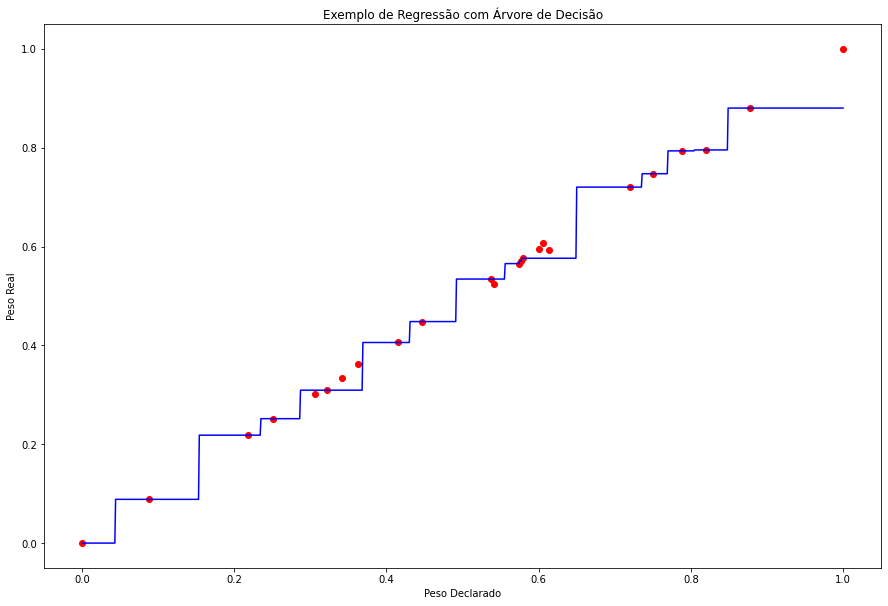

In [0]:
plt.figure(figsize=(15, 10))
X_grid = np.arange(min(entrada_arvore), max(entrada_arvore), 0.001)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(entrada_arvore,saida_arvore, color = 'red')
plt.plot(X_grid, arvore_regressora.predict(X_grid), color = 'blue')
plt.title('Exemplo de Regressão com Árvore de Decisão')
plt.xlabel('Peso Declarado')
plt.ylabel('Peso Real')
plt.show()